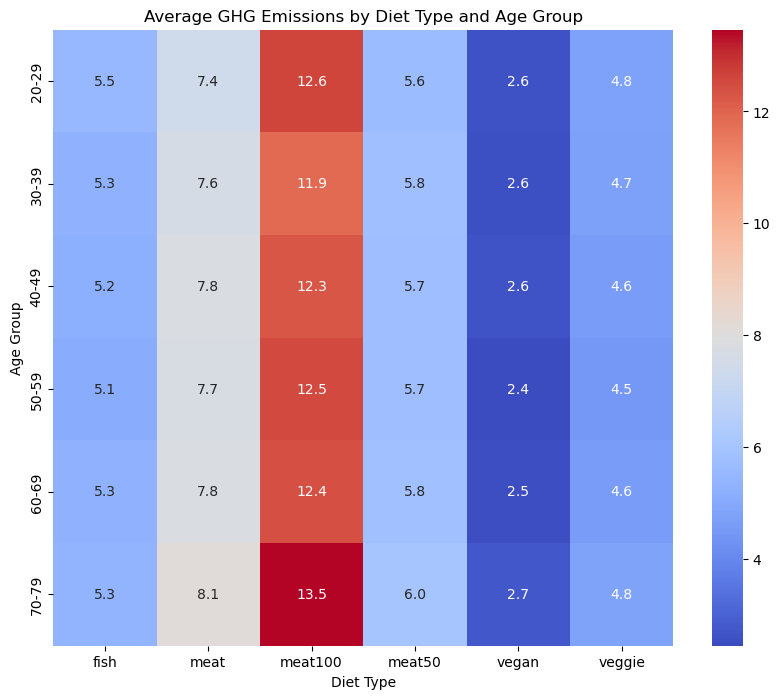

In [57]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# 假设您已经将数据文件保存在本地，并按照以下路径进行加载
path_to_data1 = '/Users/guoziyao/Downloads/Results_21Mar2022.csv'
path_to_data2 = '/Users/guoziyao/Downloads/Results_21MAR2022_nokcaladjust.csv'

data1 = pd.read_csv(path_to_data1)
data2 = pd.read_csv(path_to_data2)

# 合并数据集
merged_data = pd.concat([data1, data2], ignore_index=True)

# 对数据进行分组并计算每组的平均温室气体排放量
heatmap_data = merged_data.groupby(['diet_group', 'age_group'])['mean_ghgs'].mean().reset_index()

# 创建数据透视表，以适用于热图的格式
heatmap_data_pivot = heatmap_data.pivot(index="age_group", columns="diet_group", values="mean_ghgs")
# 使用Seaborn绘制热图


plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_pivot, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Average GHG Emissions by Diet Type and Age Group')
plt.ylabel('Age Group')
plt.xlabel('Diet Type')
plt.show()


 


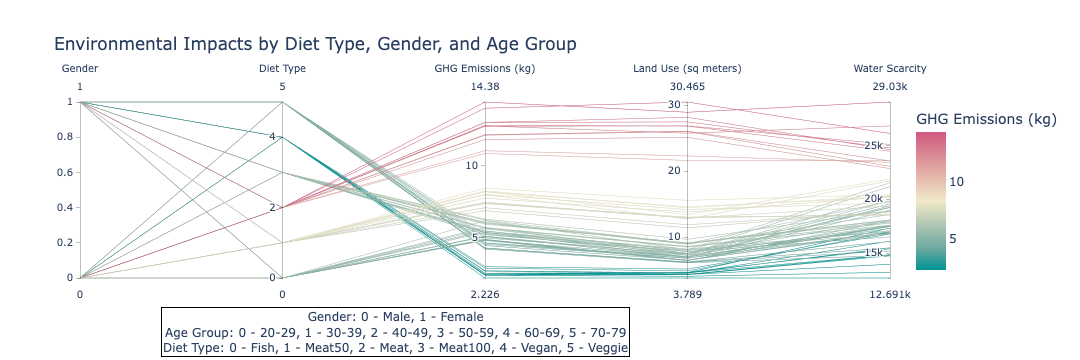

In [58]:
import pandas as pd
import plotly.express as px

# 假设你已经有了合并和清洗过的数据框架 `merged_data`

# 确保年龄组为有序类别型数据
merged_data['age_group'] = pd.Categorical(merged_data['age_group'], categories=[
    '20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], ordered=True)

# 重新组织数据聚合，包括所有需要的列
aggregation_columns = ['mean_ghgs', 'mean_land', 'mean_watscar']  # 列出需要计算平均值的列
grouped_data = merged_data.groupby(['diet_group', 'age_group', 'sex'], observed=True)[aggregation_columns].mean().reset_index()

# 平行坐标图：展示性别、年龄组、饮食类型与环境指标之间的关系
data_for_parallel = grouped_data[['sex', 'age_group', 'diet_group', 'mean_ghgs', 'mean_land', 'mean_watscar']].dropna()

# 为分类数据创建映射
sex_mapping = {'female': 1, 'male': 0}
diet_mapping = {diet: idx for idx, diet in enumerate(data_for_parallel['diet_group'].unique())}
age_mapping = {age: idx for idx, age in enumerate(sorted(data_for_parallel['age_group'].unique()))}

# 应用映射
data_for_parallel['sex'] = data_for_parallel['sex'].map(sex_mapping)
data_for_parallel['diet_group'] = data_for_parallel['diet_group'].map(diet_mapping)
data_for_parallel['age_group'] = data_for_parallel['age_group'].map(age_mapping)

# 现在使用数值化的数据重建平行坐标图
parallel_fig = px.parallel_coordinates(data_for_parallel, 
                                       dimensions=['sex', 'age_group', 'diet_group', 'mean_ghgs', 'mean_land', 'mean_watscar'],
                                       color="mean_ghgs",
                                       labels={
                                           "sex": "Gender",
                                           "age_group": "Age Group",
                                           "diet_group": "Diet Type",
                                           "mean_ghgs": "GHG Emissions (kg)",
                                           "mean_land": "Land Use (sq meters)",
                                           "mean_watscar": "Water Scarcity"
                                       },
                                       color_continuous_scale=px.colors.diverging.Tealrose,
                                       title="Environmental Impacts by Diet Type, Gender, and Age Group")


annotations = [
    dict(
        xref='paper', yref='paper',
        x=0.1, y=-0.15,  # 调整这些值以更好地定位注释
        xanchor='left', yanchor='top',
        text='Gender: 0 - Male, 1 - Female<br>' +
             'Age Group: 0 - 20-29, 1 - 30-39, 2 - 40-49, 3 - 50-59, 4 - 60-69, 5 - 70-79<br>' +
             'Diet Type: 0 - Fish, 1 - Meat50, 2 - Meat, 3 - Meat100, 4 - Vegan, 5 - Veggie',
        showarrow=False,
        bordercolor='black',
        borderwidth=1
    )
]

# 为图表添加注释
parallel_fig.update_layout(annotations=annotations)
 
# 显示图表
parallel_fig.show()
